The objective of this project is to predict presence of heart disease from attributes like blood pressure, cholestrol levels, heart rate 
and other patient attributes. Out of 76 attributes, 14 attributes have been chosen based on domain knowledge and prior research

In [7]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import model_selection 
from sklearn.metrics import classification_report, accuracy_score


In [25]:
#Import data 
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

data=pd.read_csv(url,names=columns)

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [28]:
#replace all '?' in dataframe with NaN 
data=data[~data.isin(['?'])] 
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [29]:
#Impute NaNs with zeros 
data.fillna(0,inplace=True)

In [30]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0,3.0,0


In [31]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

In [32]:
#Transform all the attributes to numeric 
data=data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


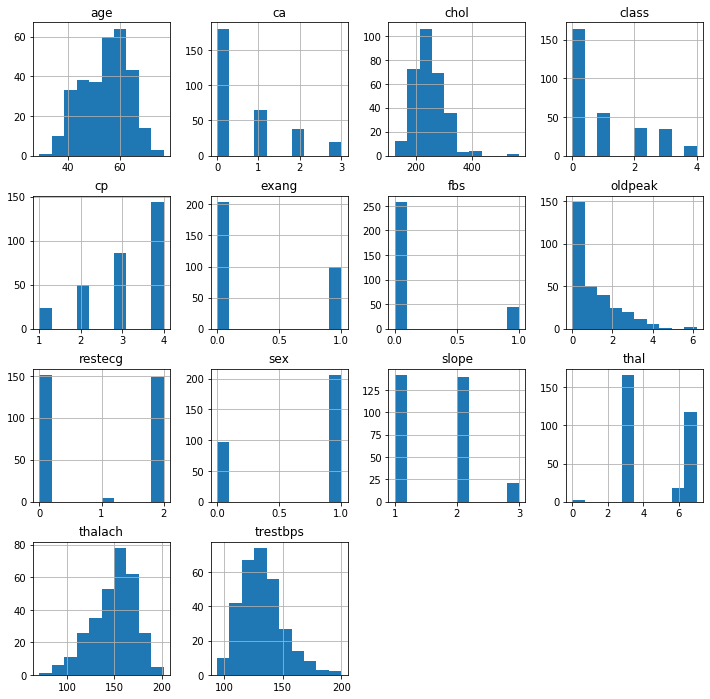

In [35]:
#Investigate distribution of each attribute 
data.hist(figsize=(12,12)) 
plt.show()

In [36]:
#Split data into train and test sets 
X=np.array(data.drop(['class'],1)) 
y=np.array(data['class'])
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [38]:
#Convert the class attribute to categorical labels 
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train[:10])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [39]:
#Train a neural network with one hidden layer. Since this is a classification problem, we can use a softmax activation function in the dense layer 
#Loss function used in categorical crossentropy 

model = Sequential()
model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation='softmax'))
    
# compile model
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,Y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3843 - accuracy: 0.5207
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3330 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3113 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2988 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2856 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.2722 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.2640 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1.2572 - accuracy: 0.5413
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1.2432 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2353 - accuracy: 0.5413
Epoch 11/

In [41]:
# we can further improve the accuracy if we model this as a binary classification problem - i.e. presence or absence of heart disease

Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1


model = Sequential()
model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    
# Compile model
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.4587
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4587
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5207
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5331
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5289
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5289
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5372
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5372
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5413
Epoch 10/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.5455
Epoch 11/

In [46]:
#predictions
binary_pred = np.round(model.predict(X_test)).astype(int) 

print("accuracy score:",accuracy_score(Y_test_binary,binary_pred))
print("Confusion matrix:",classification_report(Y_test_binary,binary_pred))

accuracy score: 0.8524590163934426
Confusion matrix:               precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.91      0.75      0.82        28

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

